In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv2DTranspose, Dropout,BatchNormalization

import numpy as np

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # Going down.
        self.conv1 = Conv2D(16, 3, padding='same', activation='relu')
        self.drop1 = Dropout(0.15)
        self.batchnorm1 = BatchNormalization()
        
        self.conv1_1 = Conv2D(16, 3, padding='same', activation='relu')
        self.drop1_1 = Dropout(0.15)
        self.batchnorm1_1 = BatchNormalization()

        self.conv2 = Conv2D(24, 3, strides=(2,2), padding='same', activation='relu')
        self.batchnorm2 = BatchNormalization()
        self.conv3 = Conv2D(24, 3, strides=(2,2), padding='same', activation='relu')
        self.conv4 = Conv2D(32, 5, strides=(5,5), padding='same', activation='relu')
        self.drop4 = Dropout(0.15)
        self.conv5 = Conv2D(64, 3, padding='same', activation='relu')
        
        # Going up.
        self.tconv0_5 = Conv2DTranspose(32, 3, padding='same', activation='relu')
        
        self.tconv1 = Conv2DTranspose(24, 3, strides=(2,2), padding='same', activation='relu')
        self.tconv2 = Conv2DTranspose(32, 3, strides=(2,2), padding='same', activation='relu')
        self.tconv3 = Conv2DTranspose(64, 5, strides=(5,5), padding='same', activation='relu')
        
        self.tconv4 = Conv2DTranspose(32, 3, padding='same', activation='relu')
        self.tconv5 = Conv2DTranspose(32, 3, padding='same', activation='relu')
        
        self.convLast = Conv2D(1, 3, padding='same', activation='relu')
        
    def call(self, inp):
        conv1 = self.conv1(inp)
        drop1 = self.drop1(conv1)
        batch1 = self.batchnorm1(drop1)
        
        conv1_1 = self.conv1_1(batch1)
        drop1_1 = self.drop1_1(conv1_1)
        batch1_1 = self.batchnorm1_1(drop1_1)

        
        conv2 = self.conv2(batch1_1)
        batch2 = self.batchnorm2(conv2)
        conv3 = self.conv3(batch2)
        conv4 = self.conv4(conv3)
        drop4 = self.drop4(conv4)
        conv5 = self.conv5(drop4)
        
        tconv0_5 = self.tconv0_5(conv5) 
        tconv1 = self.tconv1(tconv0_5)
        tconv2 = self.tconv2(tconv1)
        tconv3 = self.tconv3(tconv2)
        tconv4 = self.tconv4(tconv3)
        tconv5 = self.tconv5(tconv4)
        #x = self.tconv4(x)
        ret = self.convLast(tconv5)
        return ret
    
pass
print(tf.config.list_physical_devices('GPU'))
print('Done.')

#mnist = tf.keras.datasets.mnist

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

#x_train = x_train[..., tf.newaxis]
#x_test = x_test[..., tf.newaxis]

#x_train.shape

#train_ds = tf.data.Dataset.from_tensor_slices(
#    (x_train, y_train)).shuffle(10000).batch(32)

#for x,y in train_ds:
#    print(x.shape)


#loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#optimizer = tf.keras.optimizers.Adam()


#m = MyModel()
#prediction = m(x_train[0,...][None, ...])
#print(x_train.shape)
#m.trainable_variables
#print(y_train.shape)
#print(prediction.shape)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Done.


In [2]:
# Preparing the data.
#!git clone https://github.com/itskov/mimcry.git

from glob import glob
from os.path import join
from matplotlib.pyplot import imread, imshow, figure

datapath = './mimcry/aug_data/'

# Go over the data and create a dataset.
print(join(datapath, '*'))
sampledirs = glob(join(datapath, '*'))

x_imgs = None
y_imgs = None

for i, sampledir in enumerate(sampledirs):
    current_data_path = sampledir
    print('%d. Going over %s' % (i, current_data_path))
    
    in_filename = join(current_data_path, 'in.png')
    out_filename = join(current_data_path, 'out.png')
    
    in_img = imread(in_filename)
    out_img = imread(out_filename)
        
    # Manipulating the output image a bit.
    out_img = out_img[... ,0]
    out_img[out_img == np.min(out_img)] = 0
    out_img[out_img > 0] = 1
    out_img = out_img[..., np.newaxis]

    in_img = in_img[np.newaxis, ...]
    out_img = out_img[np.newaxis, ...]
    
    x_imgs = in_img if x_imgs is None else np.concatenate((x_imgs, in_img), axis=0)
    y_imgs = out_img if y_imgs is None else np.concatenate((y_imgs, out_img), axis=0)
    
    #print(x_imgs.shape)
    #print(y_imgs.shape)
    
print(x_imgs.shape)
print(y_imgs.shape)
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_imgs, y_imgs)).shuffle(10000).batch(5)



./mimcry/aug_data/*
0. Going over ./mimcry/aug_data/0064344e-834f-11ea-a0eb-b4b52fde4a4b
1. Going over ./mimcry/aug_data/0064344f-834f-11ea-a0eb-b4b52fde4a4b
2. Going over ./mimcry/aug_data/00643450-834f-11ea-a0eb-b4b52fde4a4b
3. Going over ./mimcry/aug_data/00643451-834f-11ea-a0eb-b4b52fde4a4b
4. Going over ./mimcry/aug_data/023a0852-834f-11ea-a0eb-b4b52fde4a4b
5. Going over ./mimcry/aug_data/023a0853-834f-11ea-a0eb-b4b52fde4a4b
6. Going over ./mimcry/aug_data/023a0854-834f-11ea-a0eb-b4b52fde4a4b
7. Going over ./mimcry/aug_data/023a0855-834f-11ea-a0eb-b4b52fde4a4b
8. Going over ./mimcry/aug_data/040eaa98-834f-11ea-a0eb-b4b52fde4a4b
9. Going over ./mimcry/aug_data/040eaa99-834f-11ea-a0eb-b4b52fde4a4b
10. Going over ./mimcry/aug_data/040eaa9a-834f-11ea-a0eb-b4b52fde4a4b
11. Going over ./mimcry/aug_data/040eaa9b-834f-11ea-a0eb-b4b52fde4a4b
12. Going over ./mimcry/aug_data/06016bba-834f-11ea-a0eb-b4b52fde4a4b
13. Going over ./mimcry/aug_data/06016bbb-834f-11ea-a0eb-b4b52fde4a4b
14. Going 

In [12]:
# Strat training.

# Instantiating the model
model = MyModel()
# Comment this if you want to start anew.
model.load_weights('./savedModel/model/')


optimizer = tf.keras.optimizers.Adam()
#loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

alpha = 0.95

#@tf.function
def train_step(x_imgs, y_imgs):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        #tf.print(x_imgs.shape)
        #loss = loss_object(tf.reshape(y_imgs, [-1]), tf.reshape(predictions, [-1]))
        
        #print(np.sum(predictions[0,...]))
        max_values = tf.reduce_max(predictions, [1,2])
        temp_predictions = tf.reshape(predictions, [predictions.shape[0], -1])
        normalized_predictions = tf.divide(temp_predictions, max_values)
        predictions = tf.reshape(normalized_predictions, predictions.shape) 
        
        #print(np.sum(lin_predictions[0,...]))
        #print(np.sum(y_imgs[0,...]))
        
        lin_predictions = tf.reshape(predictions, [-1])
        #loss = alpha * tf.keras.losses.MSE(tf.reshape(y_imgs, [-1]), lin_predictions) + (1 - alpha) * tf.norm(lin_predictions)
        loss = alpha * tf.keras.losses.MSE(tf.reshape(y_imgs, [-1]), lin_predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    #tf.print(loss)
    return loss
    

(5, 500, 500, 1)


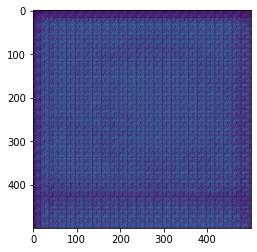

In [10]:
predictions = model(images)

a = tf.reduce_max(predictions, axis=[1,2])
b = tf.reshape(predictions,[5,-1]) 
c = tf.divide(b, a)
d = tf.reshape(c, predictions.shape)
print(d.shape)
plt.imshow(d[1,...,0])

0.00938544422
None


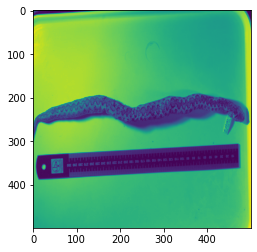

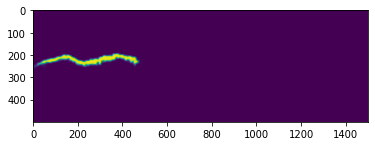

Epoch: 31
Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Step: 46
Step: 47
Step: 48
Step: 49
Step: 50
Step: 51
Step: 52
Step: 53
Step: 54
Step: 55
Step: 56
Step: 57
Step: 58
Step: 59
Step: 60
Step: 61
Step: 62
Step: 63
Step: 64
Step: 65
Step: 66
Step: 67
Step: 68
Step: 69
Step: 70
Step: 71
Step: 72
Step: 73
Step: 74
Step: 75
Step: 76
Step: 77
Step: 78
Step: 79
Step: 80
Step: 81
Step: 82
Step: 83
Step: 84
Step: 85
Step: 86
Step: 87
Step: 88
Step: 89
Step: 90
Step: 91
Step: 92
Step: 93
Step: 94
Step: 95
Step: 96
Step: 97
Step: 98
Step: 99
Step: 100
Step: 101
Step: 102
Step: 103
Step: 104
Step: 105
Step: 106
Step: 107
Step: 108
Step: 109


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

EPOCHS = 50
count = 0


for epoch in range(EPOCHS):
    print('Epoch: %d' % epoch)
    # Reset the metrics at the start of the next epoch
    for i, (images, labels) in enumerate(train_ds):
        #print('Step.')
        #print("Images shape:", images.shape)
        loss = train_step(images, labels)
        print('Step: %d' % (i,))
    
    if epoch % 2 == 0:
        clear_output(wait=True)
        print(tf.print(loss))
        prediction = model(images[np.newaxis, 0, ...])


        prediction = np.array(prediction[0, ..., 0])
        image = images[0, ..., 0]
        prediction[prediction < 0.5] = 0
        
        
        plt.figure()
        plt.imshow(image)
        plt.show()
        visimage = np.hstack((prediction, labels[0, ..., 0], image))
        plt.imshow(visimage)
        plt.imsave(join('./output/', "in_out_%d" % (count,) + ".png"), visimage)
        count += 1
        plt.show()

        # Save the weights using the `checkpoint_path` format
        model.save_weights('./savedModel/model/')
    
    #print(predictions.shape)

In [ ]:
# Going over unsegmented images and trying to segment them.

from pathlib import Path
from os import path
from scipy.misc import imresize, imread, imsave
import matplotlib.pyplot as plt

# Comment this if you want to start anew.
model = MyModel()
model.load_weights('./savedModel/model/')
unlabeld_dir = '/cs/cbio/oren/SequencingData/YifatOldData/TempEyal/temp'


for i, filename in enumerate(Path(unlabeld_dir).rglob('*.JPG')):
    print('%d. %s' % (i, path.basename(filename)))
    
    image = imread(filename, mode='RGBA')
    image = imresize(image, (500,500))
    image = image[np.newaxis, ...]
    image = np.float32(image / 255)
    #print(image.shape)
    
    predicted = np.array(model(image))
    predicted = predicted[0,...,0]
    predicted[predicted < 0.5] = 0
    
    
    predicted = np.concatenate((predicted[..., np.newaxis],) * 3, axis=2)
    predicted = (predicted * 255).astype(np.uint8)
    image = (image * 255).astype(np.uint8)
    image = image[0,...]
    
    
    from PIL import Image


    rgba_image = Image.fromarray(image)
    rgb_image = rgba_image.convert('RGB')
    image = np.array(rgb_image)
    plt.imshow(image)
    
    print(predicted.shape)
    print(image.shape)
    
    #out_figure = np.hstack((predicted, image[0,...,0])) 
    out_figure = np.concatenate((predicted, image), axis=1)
    
    plt.figure()
    plt.imshow(out_figure)
    plt.show()
    
    basename =  path.basename(str(filename)) 
    out_filename = path.join(unlabeld_dir, 'predicted',basename + ".png")
    imsave(out_filename, out_figure)
    
    